In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://huggingface.co/datasets/nprak26/remote-worker-productivity/raw/main/remote_work_productivity.csv"
df = pd.read_csv(url)

In [3]:
relevant_columns = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 
                    'Meetings_Per_Week', 'Job_Satisfaction', 'Education_Level', 'Department', 
                    'Job_Level', 'Has_Children', 'Location_Type', 'Company_Size', 'WFH_Days_Per_Week']
df = df[relevant_columns]

In [4]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [9]:
# target variable
df['WFH_Category'] = pd.cut(df['WFH_Days_Per_Week'], bins=[-1, 1, 3, 5], labels=['Low', 'Medium', 'High'])
y = df['WFH_Category']

In [8]:
# numerical features for reduction
num_cols = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 'Meetings_Per_Week', 'Job_Satisfaction']
X = df[num_cols]

In [7]:
#  SelectKBest to keep top 4 features
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Age', 'Productivity_Score', 'Meetings_Per_Week', 'Job_Satisfaction']


In [10]:
#  reduced df
df_reduced = pd.DataFrame(X_selected, columns=selected_features)
df_reduced = pd.concat([df_reduced, df.drop(columns=num_cols).reset_index(drop=True)], axis=1)

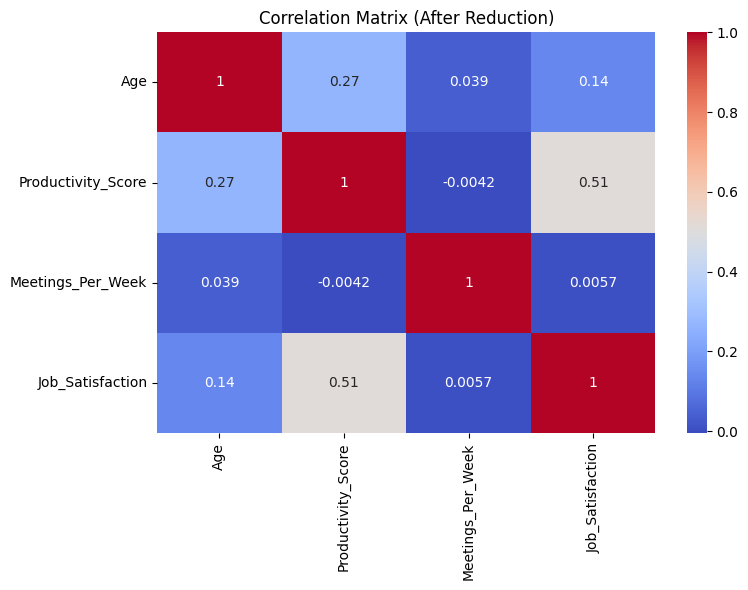

In [11]:
# correlation matrix of selected features
plt.figure(figsize=(8, 6))
sns.heatmap(df_reduced[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (After Reduction)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/correlation_after_reduction.png")
plt.show()

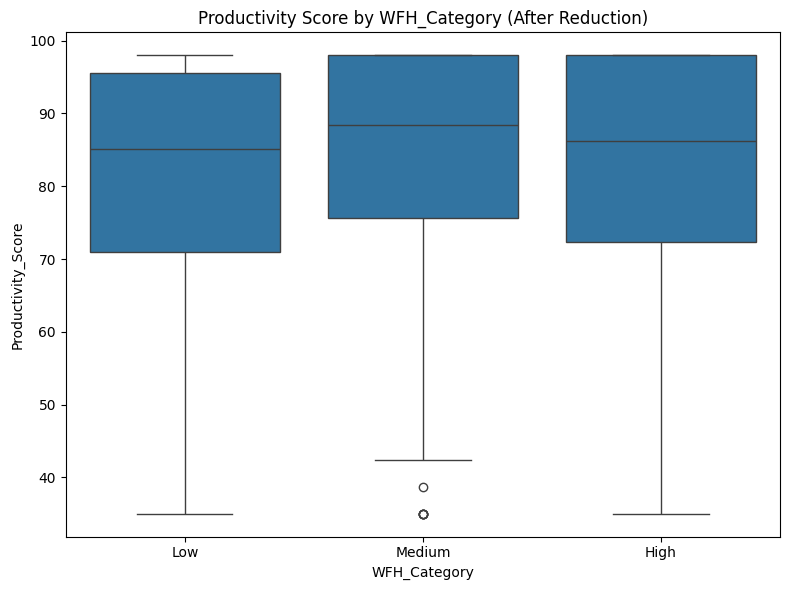

In [12]:
#Boxplot of Productivity_Score by WFH_Categor
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_reduced['WFH_Category'], y=df_reduced['Productivity_Score'])
plt.title("Productivity Score by WFH_Category (After Reduction)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/productivity_by_wfh_after_reduction.png")
plt.show()